## Iffat Chowdhury
## MTH 337 
## Instructor - Richard Hollister

# Project 4 Mayfly model

# Introduction

The Mayfly model is used to understand changes in populations of people, animals, and other organisms. Mayflies (Ephemeroptera) and damselflies (Odonata) are specifically used when trying to determine population trends because their lifespans are short and they reproduce often.(1) By understanding how a group of mayflies' population changes allows scientists and experts to make an educated hypothesis on how the population of a specific organism will be affected under certain situations.

The equation $x_n = a(M-x_n$$_-$$_1$)$x_n$$_-$$_1$ can be rewriten as $y_n = b(1-y_n$$_-$$_1)y_n$$_-$$_1$ through the steps highlighted in the project webpage.

$y_n = b(1-y_n$$_-$$_1)y_n$$_-$$_1$

The equation above will be used to understand trends that the Mayfly model shows for various $b$ and $y_0$ values.

An important note is that the values of $b$ directly depends on the value of $y_0$, which is restricted to be between $0\le y_0 \le 1$.

The purpose of a Mayfly model is to show trends of how a population reacts when put under some restrictions, like initial population size and the rate of population growth. This is what we will be testing throughout the project.

In [44]:
import numpy as num
import matplotlib.pyplot as plt

The three functions below are important and they are the framework for the more complex functions that will be used later.

There are limits put in place that restrict the value of the $b$ value based on the desired $y_0$ used.

In [45]:
def Put_In_Y0_Input(y0): # This function give a range for b values
    b = (1-y0)*y0
    upper_boundary = num.reciprocal(b)
    print("Range For b inputs are as follows, when y_0 = "+ str(y0))
    print("0 <= b <= " + str(upper_boundary) )

In [46]:
Put_In_Y0_Input(0.2)

Range For b inputs are as follows, when y_0 = 0.2
0 <= b <= 6.249999999999999


In the example above by using the function $Put$_$In$_$Y0$_$Input(y0)$ I can know that when $y_0$ is equal to 0.2 then the $b$ value has to be between 0 and 6.24999. This can be done to determine the boundary for any $b$ based on any $y_0$. We should also remember that $b$ has to be a whole number, so that also has to be accounted for when choosing a $b$ value.

Now since we have a function that gives us possible $b$ values based on $y_0$ so that the Mayfly model does not break. Now we need to get the outputs of the equation (which is $y_n$$ = b*$($1-y_0$)*$y_0$). The following function $Mayfly$_$Model(b, y0, n)$ will compile a list of $y_n$ values.  

In [47]:
def Mayfly_Model(b, y0, n): # creates a list of rates over time
    initial = b
    rate = y0
    yn = 0
    list1 = []              # compiles a list of the population rate
    while len(list1)<n:
        yn = initial*(1-rate)*rate
        rate = yn           # values of y and y0 are changing within the loop
        list1.append(yn)
    return list1

In [48]:
Mayfly_Model(4, 0.2, 10)

[0.6400000000000001,
 0.9215999999999999,
 0.28901376000000045,
 0.8219392261226504,
 0.585420538734196,
 0.970813326249439,
 0.11333924730375745,
 0.40197384929750063,
 0.9615634951138035,
 0.14783655991331973]

For example, $Mayfly$_$Model(4, 0.2, 10)$ creates a list of ten values of $y_n$ based on the $b$ value of 4 and a $y_0$ value of 0.2.

It is helpful to have the data graphed rather than having a list of numbers, so I will create the following function $Create$_$Mayfly$_$Model(b, y0, n)$ which will display the values of $y_n$ over a certain time. By having a graph it will be easier to view trends of the Mayfly model.

In [49]:
def Create_Mayfly_Model(b, y0, n): # graphs a Mayfly Model
    inputs = [i for i in range(n)]
    outputs = Mayfly_Model(b, y0, n)
    plt.xlabel('Time (Generations)')
    plt.ylabel("Population Size (rate)")
    plt.title('Mayfly model')
    plt.plot(inputs,outputs)
    plt.show() # compares Relationship Between b and time

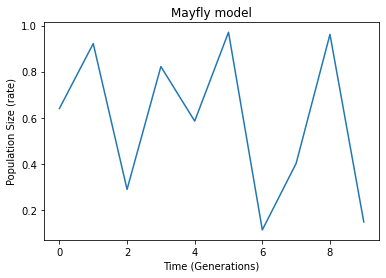

In [50]:
Create_Mayfly_Model(4, 0.2, 10)

$Create$_$Mayfly$_$Model(4, 0.2, 10)$ graphs the $y_n$ values when the $b$ value is 4 and a $y_0$ value is 0.2. The line created within the model has periods when it goes up and down but it never goes above 1 or below 0 on the y-axis.

#  

#  

# Bifurcation Models of b and y0

Along with the above functions, I will be also creating a Bifurcation Models for both $b$ and $y_0$, so that I will be able to view trends that specifically depend on each variable $b$ and $y_0$.

### Bifurcation Models for $b$

In [51]:
def bifurcation_b(b, n, generation):               # b variable is kept constant
    start = [i/100 for i in range (101)]
    xlist = []
    for i in start:
        x = Mayfly_Model(b, i, n)[generation]      # y0 variable is being changed each time
        xlist.append(x)
    plt.xlabel('$y_0$ Values')
    plt.ylabel("Rate")
    plt.title("Bifurcation Model for $b$ = " + str(b))
    plt.plot(start, xlist, label = 'Generation = ' + str(generation))
    plt.legend(fontsize = 10)

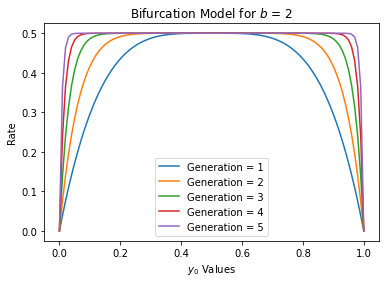

In [52]:
bifurcation_b(2, 20, 1) # inner most line
bifurcation_b(2, 20, 2)
bifurcation_b(2, 20, 3)
bifurcation_b(2, 20, 4)
bifurcation_b(2, 20, 5) # outer most line

As the generations are increasing the line is moving outwards, the first generation is the blue line and the fifth is the light purple line. The lines are all symmetrical and as the number of generations gets large the line becomes less like a hill and more like a box to use a reference.

### Bifurcation Models for $y_0$

In [53]:
def bifurcation_y0(y0, n, generation):                 # y0 variable is kept constant
    start = [i for i in range (101)]
    ylist = []
    for i in start:
        x = Mayfly_Model(i, y0, n)[generation]        # b variable is being changed each time
        ylist.append(x)
    plt.xlabel('$b$ Values')
    plt.ylabel("Rate")
    plt.title("Bifurcation Model for y0 = " + str(y0))
    plt.plot(start, ylist, label = 'Generation = ' + str(generation))
    plt.legend(fontsize = 10)

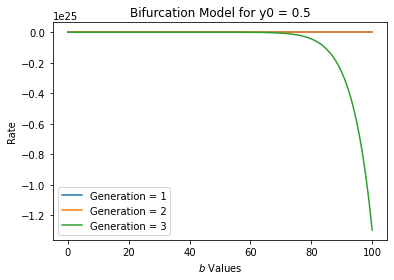

In [54]:
bifurcation_y0(0.5, 20, 1)
bifurcation_y0(0.5, 20, 2)
bifurcation_y0(0.5, 20, 3)

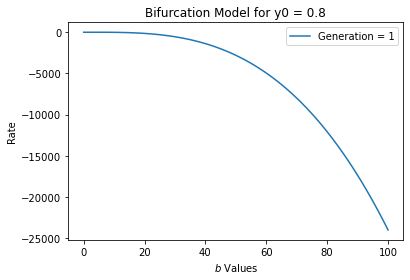

In [55]:
bifurcation_y0(0.8, 20, 1)

The bifurcation model for $y_0$ shows a downwards trend and the lines are all exponential decays. The exponential decays becomes so steeper as the number of generations become larger and this hold true for all values of $y_0$

#  

#  

#  

## Overal Trends Based On $b$ Values

By using the Bifurcation Models above I have come to the conclusion that I should focus more on the $b$ value of the equation $y_n$$ = b*$($1-y_0$)*$y_0$). To this end, I will create a function $trends$_$based$_$on$_$b(b)$ that will take the $b$ value as an input and provide ten lines that relate to an increasing value of $y_0$.

In [56]:
def trends_based_on_b(b): # graphs based on b and when y0 is [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    All_Inputs = [i for i in range(1,11)] 
    Y0_Outputs1= Mayfly_Model(b, 0.1, 10)
    Y0_Outputs2= Mayfly_Model(b, 0.2, 10)
    Y0_Outputs3= Mayfly_Model(b, 0.3, 10)
    Y0_Outputs4= Mayfly_Model(b, 0.4, 10)
    Y0_Outputs5= Mayfly_Model(b, 0.5, 10)
    Y0_Outputs6= Mayfly_Model(b, 0.6, 10)
    Y0_Outputs7= Mayfly_Model(b, 0.7, 10)
    Y0_Outputs8= Mayfly_Model(b, 0.8, 10)
    Y0_Outputs9= Mayfly_Model(b, 0.9, 10)
    plt.xlabel('$Time$')
    plt.ylabel("Population size")
    plt.title("Trends Based On The $b$ Value: b = "+str(b))
    
    plt.plot(All_Inputs, Y0_Outputs1, 'b-', label ='y0 = 0.1') 
    plt.plot(All_Inputs, Y0_Outputs2, 'g-', label ='y0 = 0.2')
    plt.plot(All_Inputs, Y0_Outputs3, 'r-', label ='y0 = 0.3')
    plt.plot(All_Inputs, Y0_Outputs4, 'c-', label ='y0 = 0.4')
    plt.plot(All_Inputs, Y0_Outputs5, 'c+', label ='y0 = 0.5')
    plt.plot(All_Inputs, Y0_Outputs6, 'm-', label ='y0 = 0.6')   
    plt.plot(All_Inputs, Y0_Outputs7, 'y-', label ='y0 = 0.7')
    plt.plot(All_Inputs, Y0_Outputs8, 'k-', label ='y0 = 0.8')
    plt.plot(All_Inputs, Y0_Outputs9, 'b+', label ='y0 = 0.9')
    
    plt.xlim(0,15)
    
    plt.legend(fontsize = 10)
    


Each graph that is created from the function $trends$_$based$_$on$_$b(b)$ graphs $y_0$ values between 0<$y_0$<1 (interval by 0.1) based on the input that represents the $b$ value. As shown below not all of the graphs contain all nine lines because for some $y_0$ values some $b$ values are not within the restricted boundary as shown through the function $Put$_$In$_$Y0$_$Input(y0)$ which gives a range for possible b values.

*Please note that the line only go between 0 and 10, the graph was make a little wider so I could fit the legend into the graph.*

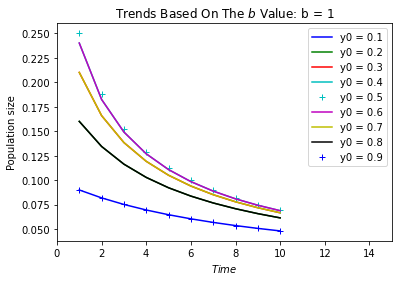

In [57]:
trends_based_on_b(1)

Exponential decay is being shown in the graph when $b = 1$.

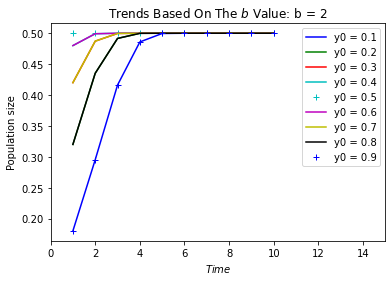

In [58]:
trends_based_on_b(2)

There is exponential growth when $b = 2$, but then to levels off at 0.5.

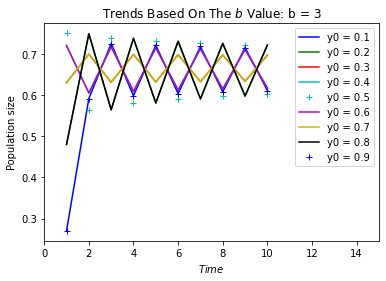

In [59]:
trends_based_on_b(3)

I think that this model is ideal because when $b = 3$ the population size is still changing but it is starting to balance out at around 0.65 or 0.67.

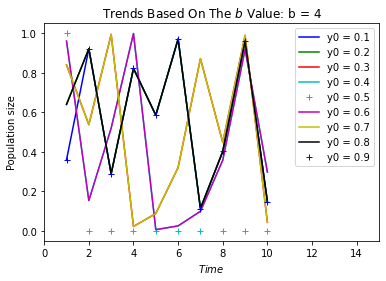

In [60]:
trends_based_on_b(4)

When $b = 4$ there are drastic moves up and down with $y_0$ = 0.5 being an outlier.

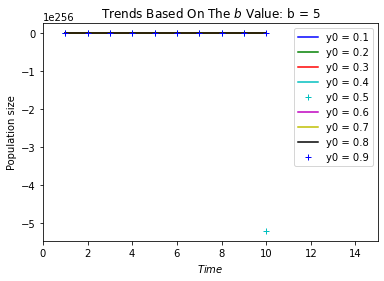

In [61]:
trends_based_on_b(5)

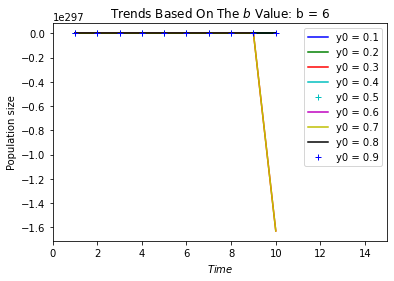

In [62]:
trends_based_on_b(6)

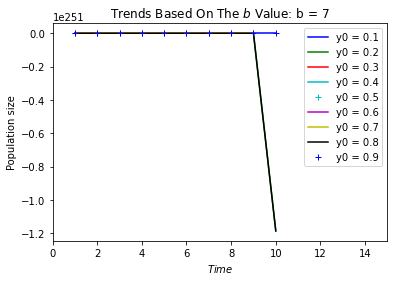

In [63]:
trends_based_on_b(7)

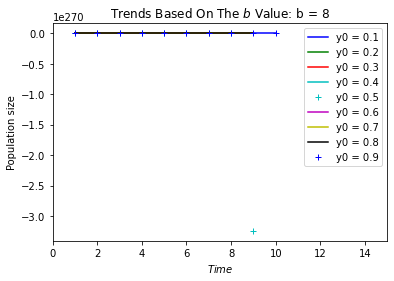

In [64]:
trends_based_on_b(8)

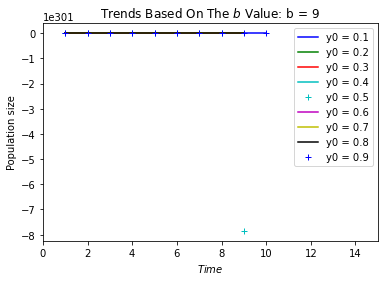

In [65]:
trends_based_on_b(9)

Now by looking at the graphs above I want to specificly analysis the $b$ values of 1, 2, 3, and 4 because their graphs are the ones that are standing out. I will test each of these four $b$ values under the restrictions set by the assignment to make ceartain conclusions in the analyzation section of the project.

  # Analyzation

1. The value of $y_0$ is specifically linked to the values of $b$ that can be inputted within a Mayfly model, to account for this I created the function $Put$_$In$_$Y0$_$Input(y0)$, when putting in a desired $y_0$ as the input into this function it provides a range for acceptable values for the $b$ input. The function $boundary(y0)$ gives the maximum value that $b$ can be based on the $y_0$ value inputted. The relationship between the $y_0$ value and the maximum value for $b$ are parabolic.   

In [66]:
def boundary(y0):
    b = (1-y0)*y0
    upper_boundary = num.reciprocal(b)
    return upper_boundary # specifically gives the upper boundary of b

In [67]:
def Outputs(Inputs): # input would be a lsit of y0 values
    list1 = []
    w = 0
    for i in Inputs:
        w = boundary(i)
        list1.append(w)
    return list1     # result will be the associating upper boundary of b values related to each input
   

In [68]:
Outputs([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

[11.111111111111109,
 6.249999999999999,
 4.761904761904762,
 4.166666666666667,
 4.0,
 4.166666666666667,
 4.761904761904762,
 6.250000000000001,
 11.111111111111112]

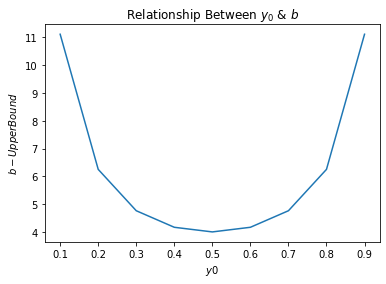

In [69]:
inputs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
outputs = [11.111111111111109, 6.249999999999999, 4.761904761904762, 4.166666666666667, 
           4.0, 4.166666666666667, 4.761904761904762, 6.250000000000001, 11.111111111111112]
plt.xlabel('$y0$')
plt.ylabel('$b - Upper Bound$')
plt.title('Relationship Between $y_0$ & $b$')
plt.plot(inputs,outputs)
plt.show() # shows the relationship between y0 & b

The relationship between the $y_0$ value and the maximum value for $b$ are parabolic.   

## Relation to Real Life 


For any population on Earth, there is a naturally occurring balance act that occurs. The population fluctuates, it rises and then falls or vise versa when it reaches a certain threshold.

For example, if the population of rabbits in a closed environment becomes too high then they will overeat the supply of their diet, which in this case we will just consider grass. So if the population of rabbits is too high there won't be enough grass to feed all of the rabbits, so some of them will die. If the population of rabbits is too low there will be more than enough grass for them to feed on, which will cause the population of rabbits to increase over time.

Overall, if the population of each species gets too high it will decrease over time and if it gets too low relative to the food they consume their population will increase over time. If this trend does not hold then some species may end up going extinct.

2. For any $y_0$ value put into the function $Create$_$Mayfly$_$Model$ if the value of $b$ is closer to the lower boundary and/or is equal to 1 then the Mayfly model will show an exponential decay trend.

Range For b inputs are as follows, when y_0 = 0.3
0 <= b <= 4.761904761904762


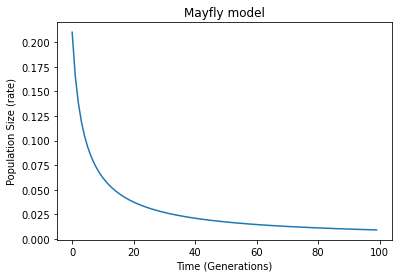

In [70]:
Put_In_Y0_Input(0.3)
Create_Mayfly_Model(1, 0.3, 100)

Range For b inputs are as follows, when y_0 = 0.67
0 <= b <= 4.522840343735866


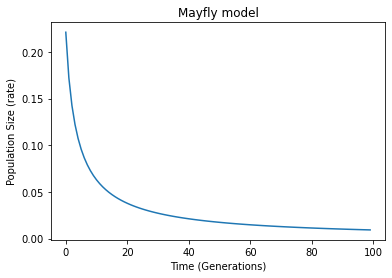

In [71]:
Put_In_Y0_Input(0.67)
Create_Mayfly_Model(1, 0.67, 100)

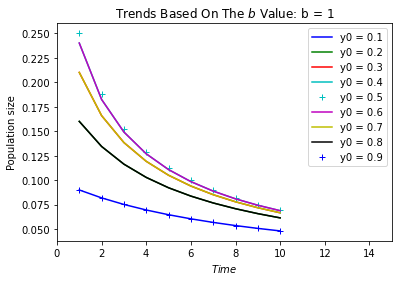

In [72]:
trends_based_on_b(1)

###### Bifurcation Model

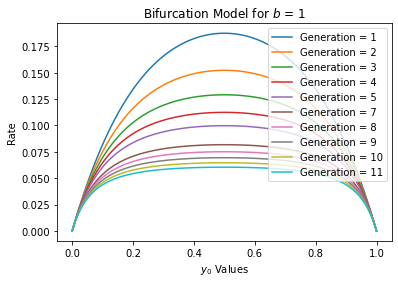

In [73]:
bifurcation_b(1, 20, 1) # upper most line (Blue)
bifurcation_b(1, 20, 2)
bifurcation_b(1, 20, 3)
bifurcation_b(1, 20, 4)
bifurcation_b(1, 20, 5)
bifurcation_b(1, 20, 7) 
bifurcation_b(1, 20, 8)
bifurcation_b(1, 20, 9)
bifurcation_b(1, 20, 10)
bifurcation_b(1, 20, 11) # lower most line (light green)


## Relation to Real Life (Unsustainable)

This makes sense because the population size of the species would be too low to be sustained, if there are not many animals of one type of species it becomes difficult for them to reproduce, you need at least two of one species for them to reproduce.

3. For specific $y_0$ value put in to the function $Create$_$Mayfly$_$Model$ if the value of $b$ is equal to 4
then the Mayfly model will show an extreme trend that goes up and down and gets very close to both 1 and 0. 

Range For b inputs are as follows, when y_0 = 0.67
0 <= b <= 4.522840343735866


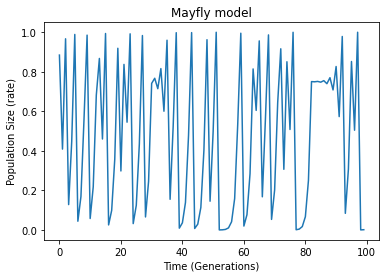

In [74]:
Put_In_Y0_Input(0.67)
Create_Mayfly_Model(4, 0.67, 100)

Range For b inputs are as follows, when y_0 = 0.42
0 <= b <= 4.105090311986864


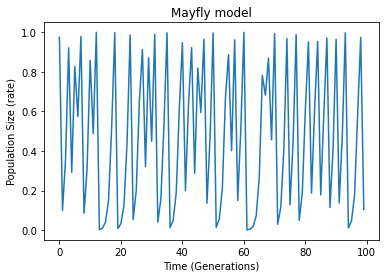

In [75]:
Put_In_Y0_Input(0.42)
Create_Mayfly_Model(4, 0.42, 100)

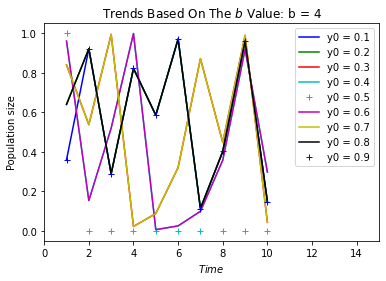

In [76]:
trends_based_on_b(4)

###### Bifurcation Models

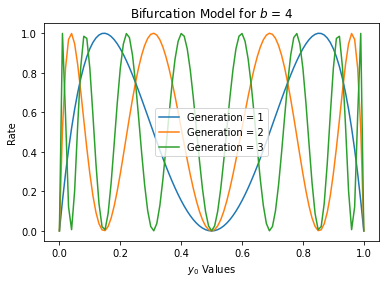

In [77]:
bifurcation_b(4, 20, 1) # lowest amount of tops
bifurcation_b(4, 20, 2) 
bifurcation_b(4, 20, 3) # Highest amount of tops


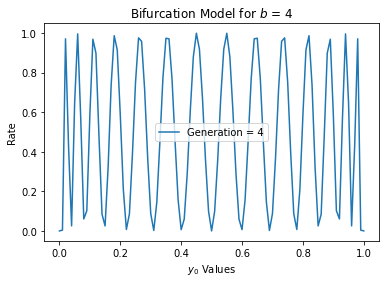

In [78]:
bifurcation_b(4, 20, 4) 

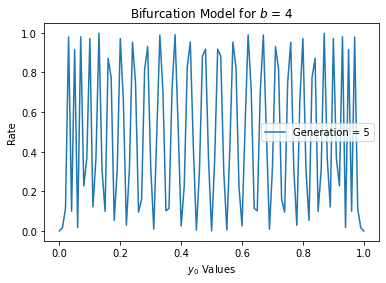

In [79]:
bifurcation_b(4, 20, 5) 

## Relation to Real Life (Sustainable)

Although a population that meets these standards will be sustainable it is still very risky when the population goes very close to becoming too high and too low at some points shown in the two Mayfly models above, this means that the population came very close to becoming extinct but managed to bounce back. 

4. To find the ideal population for a specific $y_0$ value put into the function $Create$_$Mayfly$_$Model$ then $b$ has to be a value that results in a Mayfly Model that creates a line that is centering at a certain value on the positive $y-axis$ overtime as shown in the examples below.

Range For b inputs are as follows, when y_0 = 0.5
0 <= b <= 4.0


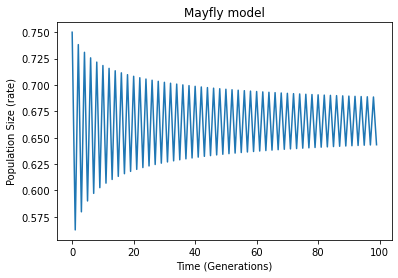

In [80]:
Put_In_Y0_Input(0.5)
Create_Mayfly_Model(3, 0.5, 100)

Range For b inputs are as follows, when y_0 = 0.8
0 <= b <= 6.250000000000001


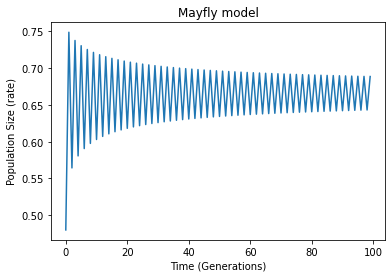

In [81]:
Put_In_Y0_Input(0.8)
Create_Mayfly_Model(3, 0.8, 100)

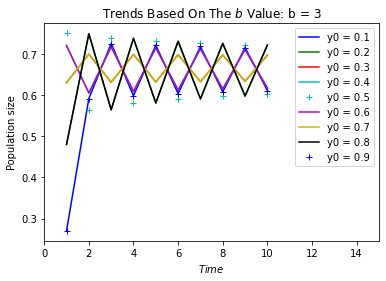

In [82]:
trends_based_on_b(3)

In [83]:
###### Bifurcation Models

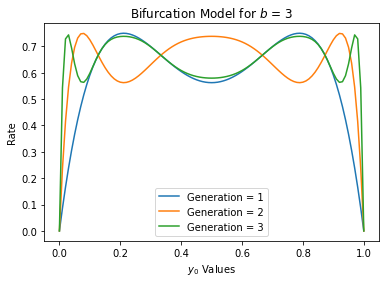

In [84]:
bifurcation_b(3, 20, 1) # blue line
bifurcation_b(3, 20, 2) # orange line
bifurcation_b(3, 20, 3) # green line

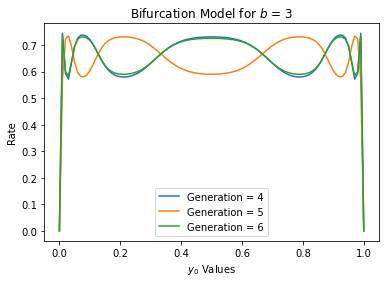

In [85]:
bifurcation_b(3, 20, 4) # blue line
bifurcation_b(3, 20, 5) # orange line
bifurcation_b(3, 20, 6) # green line

 ## Relation to Real Life (Sustainable)
 
This is the ideal model that a population should follow, overtime a population should balance out to a place where the amount of the species and the food supply can balance out. These types of species are safest from going extinct.

#   

#   

# Conclusion

Although the Mayfly model is usually used in real-life experiments with the use of mayflies. It allows users to understand how populations of certain animals or organisms will behave. 

After, creating multiple graphs that compares $b$, $y_0$, and $y_n$ values based on the equation $x_n = a(M-x_n$$_-$$_1$)$x_n$$_-$$_1$, I was able to come to conclusions on how a population is impacted by certain restrictions. Additionally, the Bifurcation Models created for both $b$ and $y_0$ shows how each generation is impacted by the values of $b$ and $y_0$ independently. All of the functions and tools have shown how useful a Mayfly model can be along with some of the shortcomings that are associated with them. Although the Mayfly model is not flawless it is still extremely helpful to understand how populations react when put under certain conditions.

The biggest takeaway from my analyzation is that when a Mayfly Model creates a line that is centering at a certain value on the positive $y-axis$ overtime, then these variables are what results in a very sustainable population over the long term, for example, a model that shows this, take a look at the fourth point on the Analyzation section of the project.

In the function $trends$_$based$_$on$_$b(b)$ when $b$ equals to 3 it creates a graph that is centering overtime which is an ideal model. 

The ideal population size is one that demonstrates this overtime the population is balanced out to a place where the amount of the species and the food supply is just right. So there will be just enough predators and pray for both of their respective species to be sustainable.

If the initial population is too low or too high the population will not be able to be sustained over time. After accounting for the rate at which the population changes there is a sweet spot at which the population needs to stay in order for the species to be the safest from going extinct.

# Bibliography

1. Author: Isabel Almudi, Posted by isabelalmudi
Link: https://thenode.biologists.com/mayflies-an-emergent-model-to-investigate-the-evolution-of-winged-insects/research/
